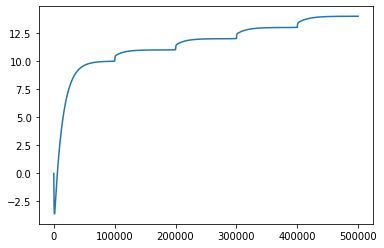

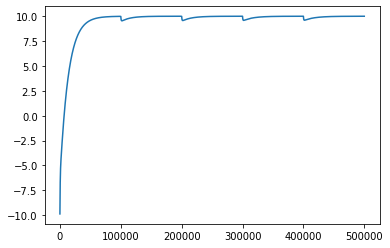

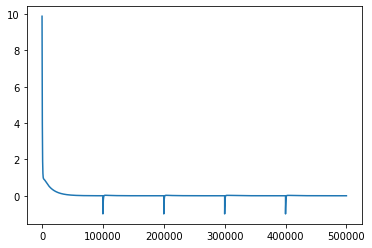

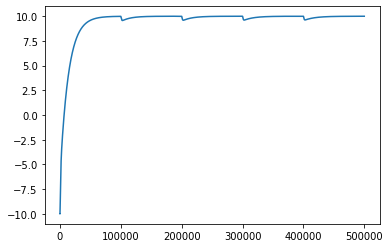

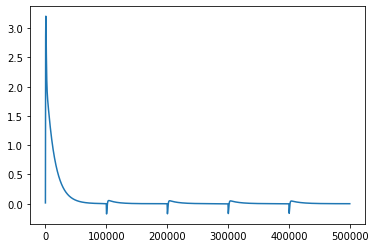

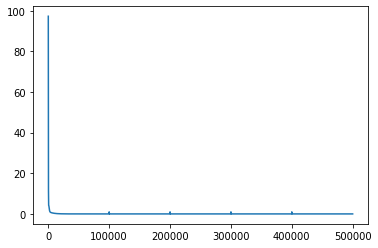

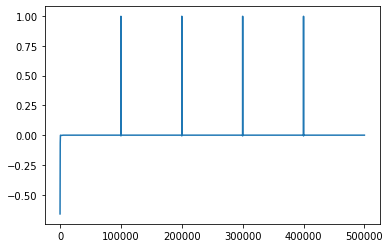

In [ ]:
# An Active Inference Cruise Controller based heavily off Manuel's thesis but actually working.
#Contains a straightforward implementation of linear continuous time active inference.
import numpy as np
import matplotlib.pyplot as plt

sigma_w = 1
sigma_z = 1
sigma_zdot = 1
 
class GenerativeProcess(object):
  def __init__(self,init_v, init_u, alpha):
    self.v = init_v
    self.alpha = alpha
    self.u = init_u
    self.dt = 0.001
    self.a = self.update(self.u)

  def update(self,u):
    self.a = -(self.alpha * self.v) + u #+ np.random.normal(0,sigma_w)
    self.v = self.v + (self.dt * self.a) 
    return self.v , self.a 


class Agent(object):
  def __init__(self,init_vbelief, init_abelief, pz,pzdot, pw,alpha,vdesired): #change coeffs of friction in the model to see if agent can cope with misspecified generative model
    self.vbelief = init_vbelief
    self.abelief = init_abelief
    self.pz = pz
    self.pzdot = pzdot
    self.pw = pw
    self.dt = 0.001
    self.alpha = alpha
    self.vdesired = vdesired
    self.u = 0
    self.k=0.2

  def update_vbelief(self,yv, ya):
    dv = self.abelief - ((-self.pz * (yv - self.vbelief)) + (self.pw *(self.alpha + self.k) *(self.abelief + (self.alpha * self.vbelief) - (self.k * (self.vbelief - self.vdesired)))))
    return self.vbelief + (self.dt * dv)

  def update_abelief(self,ya):
    da = 0 - ((-self.pzdot * (ya - self.abelief)) + (self.pw * (self.abelief + self.alpha * self.vbelief + (self.k * (self.vbelief - self.vdesired)))))
    return self.abelief + (self.dt * da)

  def update_action(self,ya):
    udot = (self.pzdot * (ya - self.abelief)) + (self.pz * (yv - self.vbelief))
    self.u -= self.dt * udot

  def update(self,yv,ya):
    vbelief = self.update_vbelief(yv,ya)
    abelief = self.update_abelief(ya)
    self.vbelief = vbelief
    self.abelief = abelief
    self.update_action(ya)
    return self.u,self.vbelief, self.abelief


env = GenerativeProcess(-10,0,1)
agent = Agent(-10,0, 1,1,1,0,10)
#run forward time in the process
us = []
yvs = []
yas = []
yv,ya = env.update(0)
vbeliefs = []
abeliefs = []
V = []
F = []
dF = []
for i in range(500000):
  if i %100000 == 0:
    env = GenerativeProcess(yv,u,1 + ((i/100000)*0.1))
  u, vbelief, abelief= agent.update(yv,ya)
  yv,ya = env.update(u)
  us.append(u)
  yvs.append(yv)
  yas.append(ya)
  vbeliefs.append(vbelief)
  abeliefs.append(abelief)
  V.append((yv-agent.vdesired)**2)
  F.append((yv - vbelief)**2 + (ya - abelief)**2)
  if i >= 1:
    dF.append(F[i] - F[i-1])

plt.plot(us)
plt.show()
plt.plot(yvs)
plt.show()
plt.plot(yas)
plt.show()
plt.plot(vbeliefs)
plt.show()
plt.plot(abeliefs)
plt.show()
plt.plot(F)
plt.show()
plt.plot(dF)
plt.show()
